# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review any of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

In [91]:
# Insert your answer here and fee free to add markdown cells as needed
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Problem 1A Solution

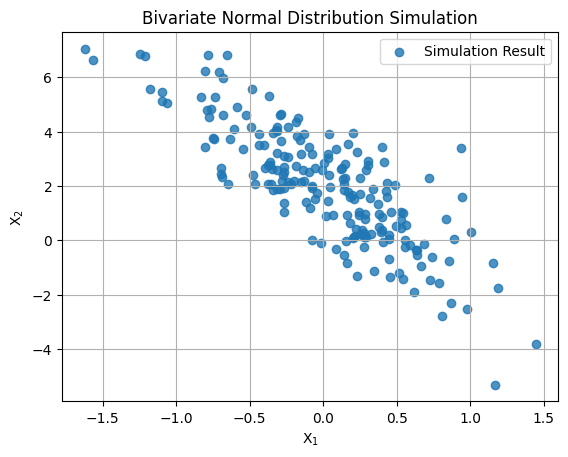

In [92]:
##### Problem 1A Solution #####

# Set seed for reproducibility
np.random.seed(42)

# Mean vector and covariance matrix taken from Example 6.6 on page 200 of Math for ML: https://mml-book.github.io/book/mml-book.pdf
mean_vector = np.array([0, 2])
covariance_matrix = np.array([[0.3, -1], [-1, 5]])
num_samples = 200

# Generate samples from the bivariate normal distribution
samples = np.random.multivariate_normal(mean_vector, covariance_matrix, num_samples)

# Plot the results
plt.scatter(samples[:, 0], samples[:, 1], label='Simulation Result', alpha=0.8)
plt.title('Bivariate Normal Distribution Simulation')
plt.xlabel('$\mathregular{X_1}$')
plt.ylabel('$\mathregular{X_2}$')
plt.legend()
plt.grid(True)
plt.show()

# Problem 1B Solution

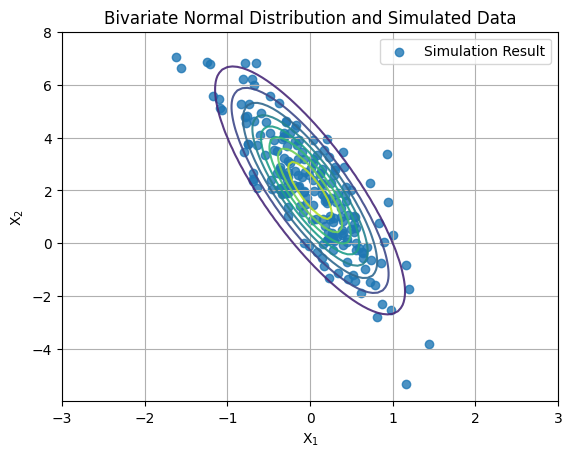

In [93]:
##### Problem 1B Solution #####

# Create a meshgrid for plotting contours
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 8, 100))
pos = np.dstack((x, y))

# Calculate the bivariate normal PDF for the meshgrid
rv = multivariate_normal(mean_vector, covariance_matrix)
z = rv.pdf(pos)

# Plot the contours of the bivariate normal distribution
plt.contour(x, y, z, levels=10, cmap='viridis', alpha=0.9)

# Plot the simulated points
plt.scatter(samples[:, 0], samples[:, 1], label='Simulation Result', alpha=0.8)

# Add labels and legend
plt.title('Bivariate Normal Distribution and Simulated Data')
plt.xlabel('$\mathregular{X_1}$')
plt.ylabel('$\mathregular{X_2}$')
plt.legend()
plt.grid(True)
plt.show()

## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vectors onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ? Show the vectors which denote the first 2 principal components.

### Problem 2B (5 points)

Plot the projected vectors in the subspace of first 2 principal components.

### Problem 2C (10 points)

Reverse the projection to map back to the original 3D space and create a scatter plot to show the reconstructed points. Do the reconstructed points have identical/similar but not identical/different correlations in respective components as the original matrix?



# Problem 2 Solution:

In [94]:
# Set the random seed for reproducibility
np.random.seed(42)

# Covariance matrix
cov_matrix = np.array([[4, 2, 1], [2, 3, 1.5], [1, 1.5, 2]])

# Simulate a 3D Gaussian random vector, set mean vector to origin
mean_vector = np.zeros(3)
random_gauss_vectors = np.random.multivariate_normal(mean_vector, cov_matrix, num_samples)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(cov_matrix)

# Display the results
print("Simulated 3D Gaussian random vector:")
print(random_gauss_vectors[:5, :])  # Display only the first 5 rows for readability

print("\nSingular Values as Diagonal Matrix:")
print(np.diag(S))

print("\n U")
print(U)

print("\n Vt")
print(Vt)

Simulated 3D Gaussian random vector:
[[-0.87745873 -1.0769666   0.0627504 ]
 [-2.93873154 -2.02277804 -1.39397809]
 [-2.14274073 -2.53083189 -2.43290628]
 [-1.47687944 -0.2653177  -0.42595077]
 [-2.55138493  1.80145119  0.2558121 ]]

Singular Values as Diagonal Matrix:
[[6.2599587  0.         0.        ]
 [0.         1.89870009 0.        ]
 [0.         0.         0.84134121]]

 U
[[-0.70173922  0.68097512  0.20936798]
 [-0.60421021 -0.41315066 -0.68134907]
 [-0.37748125 -0.60463164  0.70137614]]

 Vt
[[-0.70173922 -0.60421021 -0.37748125]
 [ 0.68097512 -0.41315066 -0.60463164]
 [ 0.20936798 -0.68134907  0.70137614]]


# Problem 2A Solution

In [95]:
# Select the first two principal components
principal_components = U[:, :2]

print("Principal Components:")
print(principal_components)

Principal Components:
[[-0.70173922  0.68097512]
 [-0.60421021 -0.41315066]
 [-0.37748125 -0.60463164]]


# Problem 2B Solution

Projected Data:
[[ 1.24277431 -0.19051898]
 [ 3.81060691 -0.32264772]
 [ 3.95117617  1.05747384]
 [ 1.35748032 -0.63855866]
 [ 0.60538741 -2.6363725 ]]



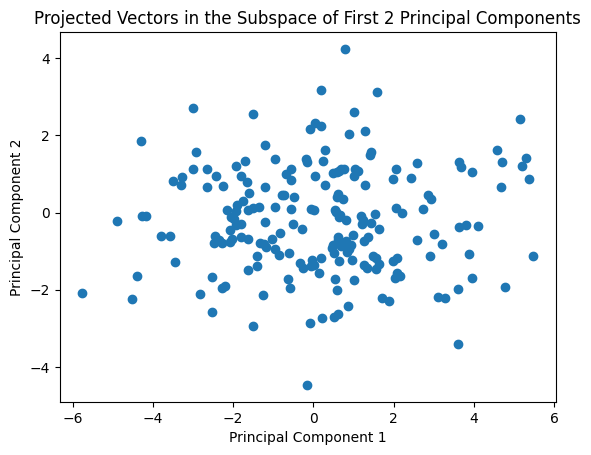

In [96]:
# Project the simulated vectors onto the subspace spanned by the first two principal components
projected_data = np.dot(random_gauss_vectors, principal_components)

print("Projected Data:")
print(projected_data[:5, :])  # Display the projected data for the first 5 rows for readability
print()

# Plot the projected vectors in 2D
plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.title('Projected Vectors in the Subspace of First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Problem 2C Solution


The reconstructed points will have similar but not identical correlations in their respective components. This is because reducing the data to its principal components projects the data onto a lower-dimensional subspace while retaining the principal components that capture its maximum variance. When you reverse the projection, you are mapping the points back into the original space using the retained principal components.

The key point is that the principal components capture the directions of maximum variance in the original data. While the magnitudes of the components are preserved during projection and reconstruction, the specific values and correlations may not be identical due to the reduction in dimensionality.

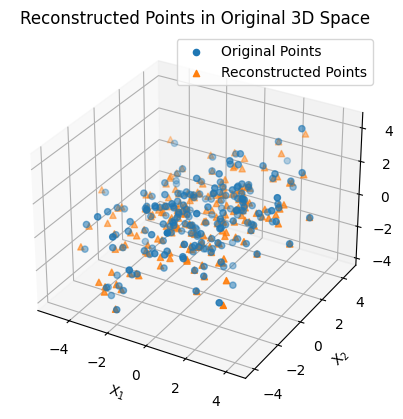

In [97]:
# reconstruct the data using the projected data and the transpose of the principal components
reconstructed_data = np.dot(projected_data, principal_components.T)

# Plot the reconstructed points in the original 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(random_gauss_vectors[:, 0], random_gauss_vectors[:, 1], random_gauss_vectors[:, 2], label='Original Points')
ax.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], reconstructed_data[:, 2], label='Reconstructed Points', marker='^')
ax.set_title('Reconstructed Points in Original 3D Space')
ax.set_xlabel('$\mathregular{X_1}$')
ax.set_ylabel('$\mathregular{X_2}$')
ax.set_zlabel('$\mathregular{X_3}$')
ax.legend()
plt.show()

### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [98]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=10, batch_size=1):
    """
    Implements the stochastic gradient descent algorithm.

    Parameters:
    - X: Input features (numpy array with shape [num_samples, num_features])
    - y: Target values (numpy array with shape [num_samples, 1])
    - learning_rate: Learning rate for the update step
    - num_epochs: Number of passes through the entire dataset
    - batch_size: Number of samples in each mini-batch

    Returns:
    - weights: Learned model parameters (numpy array with shape [num_features, 1])
    - losses: List of average losses at each epoch
    """

    num_samples, num_features = X.shape
    weights = np.zeros((num_features, 1))
    losses = []

    for epoch in range(num_epochs):
        total_loss = 0.0

        # Shuffle the data for each epoch
        permutation = np.random.permutation(num_samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(0, num_samples, batch_size):
            # Get mini-batch
            X_mini_batch = X_shuffled[i:i + batch_size]
            y_mini_batch = y_shuffled[i:i + batch_size]

            # Compute predictions
            predictions = np.dot(X_mini_batch, weights)

            # Compute loss and gradient
            error = predictions - y_mini_batch
            loss = np.mean(error ** 2)
            gradient = 2 * np.dot(X_mini_batch.T, error) / batch_size

            # Update weights
            weights -= learning_rate * gradient

            total_loss += loss

        # Average loss for the epoch
        average_loss = total_loss / (num_samples / batch_size)
        losses.append(average_loss)

        print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss}")

    return weights, losses

# Problem 3 Solution Implemented

## Hyperparameters: batch size = 5, learning rate = 0.008

Batch size of 5 consistently yielded the lowest loss, and was found by simple trial and error. Learning rate of 0.008 yielded a loss of ~0.98309, which slightly outperformed the standard learning rate of 0.01 with ~0.98363, also discovered by trial and error.


Epoch 1/10, Average Loss: 4.827004226475481
Epoch 2/10, Average Loss: 1.1823672608441231
Epoch 3/10, Average Loss: 1.072001246555161
Epoch 4/10, Average Loss: 1.0220699281529406
Epoch 5/10, Average Loss: 1.0021740114900388
Epoch 6/10, Average Loss: 0.9908196495572236
Epoch 7/10, Average Loss: 0.9848740831293826
Epoch 8/10, Average Loss: 0.9868341507456562
Epoch 9/10, Average Loss: 0.9854617462811721
Epoch 10/10, Average Loss: 0.9830948898707094



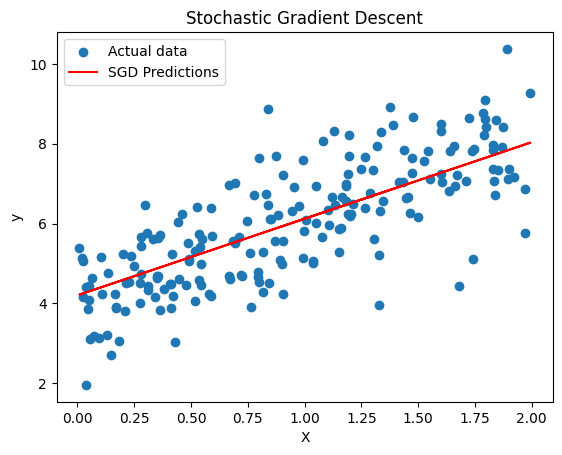

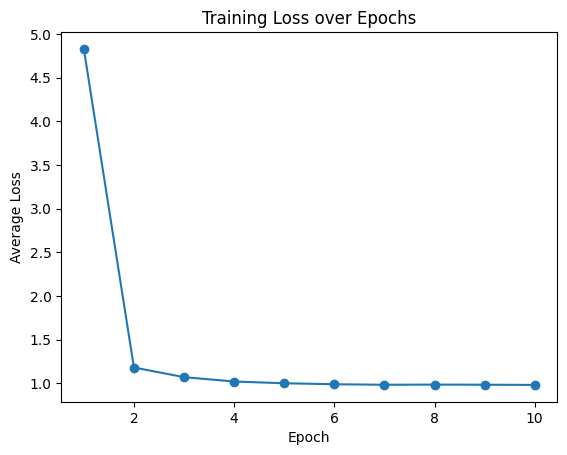

In [99]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)

# Create arbitrary, linear relationship between x and y, beat hitchhiker's reference into the ground
y = 4 + 2 * X + np.random.randn(1000, 1)

# Split the data into training and validation sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_validation = X[:split_index], X[split_index:]
y_train, y_validation = y[:split_index], y[split_index:]

# Add a bias term to the features, necessary to account for when y intercept != 0
X_train_biased = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_validation_biased = np.c_[np.ones((X_validation.shape[0], 1)), X_validation]

# Run SGD
weights, losses = stochastic_gradient_descent(X_train_biased, y_train, learning_rate=0.008, num_epochs=10, batch_size=5)

# Test the model on the validation set
predictions = np.dot(X_validation_biased, weights)
print()

# Plot the results
plt.scatter(X_validation, y_validation, label='Actual data')
plt.plot(X_validation, predictions, color='red', label='SGD Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Stochastic Gradient Descent')
plt.legend()
plt.show()
print()

# Plot the training loss over epochs
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss over Epochs')
plt.show()


### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements for the linear regression problem from scratch that can improve the convergence speed of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

In [100]:
# Insert your answer here and fee free to add markdown cells as needed
# %reset -f